### Loading The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Loading The Data

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\14. Decision Tree\Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.iloc[3,0]

7.4

#### Converting the Target Variable "Sales" from Continuous Data to Categorical Data

In [4]:
y = []
for i in range(0,400):
    if data.iloc[i,0]<=data['Sales'].median():
        y.append('Low')
    else:
        y.append('High')
print(y)

['High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 

In [5]:
y_le = preprocessing.LabelEncoder().fit_transform(y)
y_le

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [6]:
y_conv = pd.DataFrame(y_le, columns = ['Sale'])

In [7]:
y_conv

,Sale
0,0
1,0
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


In [8]:
df = data.iloc[:,1:]
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


##### We need 'One Hot Encoding' or dummy variables for three categorical features.

In [9]:
df_enc = pd.get_dummies(df)
df_enc

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
X = df_enc
Y = y_conv

#### Splitting the data into Training and Testing dataset 

In [11]:
# test_size = 0.25, means 25% of the data is kept as test data and rest 75% is kept as training data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=40)

#### Building Decision Tree Classifier using Entropy Criteria

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Plot the Decision Tree

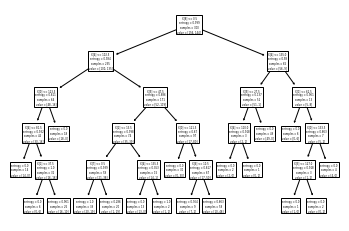

In [13]:
tree.plot_tree(model);

In [14]:
fn = ['Competitor Price ($)','Income ($)','Advertising ($)','Population','Price ($)','Age','Education','ShelveLoc_Bad',\
      'ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn = ['High','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Predicting the Test Data

In [15]:
pred = model.predict(X_test)

In [16]:
pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [17]:
pd.Series(pred).value_counts()

0    55
1    45
dtype: int64

In [18]:
pd.crosstab(Y_test,pred)

ValueError: Shape of passed values is (1, 2), indices imply (100, 2)